In [28]:
pip install rdkit-pypi

Note: you may need to restart the kernel to use updated packages.


In [29]:
pip install --upgrade scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [30]:
pip install deepsmiles

Note: you may need to restart the kernel to use updated packages.


In [31]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pprint
import pickle

#  load data

In [32]:
df = pd.read_csv('/kaggle/input/finaldataset/wguuefiofioqfihif.csv')
df.tail()

,SMILES,Class
7715,c1ccc(cc1)CC2C(=O)NC(C(=O)NC(C(=O)NC(CSSCCC(=O...,0
7716,CC1C(C(CC(O1)OC2CCC3(C(C2)CCC4C3CC(C5(C4(CCC5C...,0
7717,COc1cc(cc(c1OC)OC)C(=O)OC2CC3CN4CCc5c6ccccc6[n...,0
7718,CN(CCCCCCCCCCN(C)C(=O)Oc1cccc(c1)[N+](C)(C)C)C...,0
7719,c1cc(c(cc1Cl)Cl)CON=C(Cn2ccnc2)c3ccc(cc3Cl)Cl,0


# preprocessing

In [33]:
df.info()
df.drop_duplicates( keep='first', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7720 entries, 0 to 7719
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   SMILES  7720 non-null   object
 1   Class   7720 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 120.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7720 entries, 0 to 7719
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   SMILES  7720 non-null   object
 1   Class   7720 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 120.8+ KB


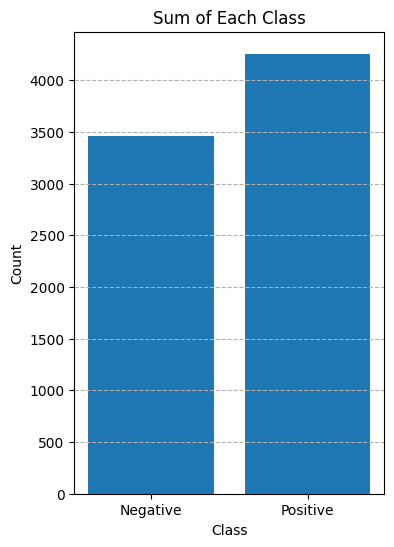

In [34]:
import matplotlib.pyplot as plt

# Calculate counts of each class
class_counts = df['Class'].value_counts().sort_index()

# Replace class labels with 'negative' and 'positive'
class_labels = ['Negative', 'Positive']

plt.figure(figsize=(4, 6))
plt.bar(class_labels, class_counts)
plt.title('Sum of Each Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--')

plt.show()


In [35]:
class_counts = df['Class'].value_counts().sort_index()
print(class_counts)
df.info()

Class
0    3464
1    4256
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7720 entries, 0 to 7719
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   SMILES  7720 non-null   object
 1   Class   7720 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 120.8+ KB



# first model

In [36]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Load the DataFrame
df = pd.read_csv('/kaggle/input/finaldataset/wguueflofioqfihif.csv')

# Generate Morgan fingerprints for each SMILES string
def generate_morgan_fingerprint(smiles):
    mol = Chem.MolFromSmiles(smiles)
    morgan_fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2)  # Radius 2
    return morgan_fp

# Generate fingerprints for all SMILES strings
X = [generate_morgan_fingerprint(smiles) for smiles in df['SMILES']]

# Use class labels as target variable
y = df['Class'].tolist()

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an SVM model
svm_model = SVC()

# Train the model
svm_model.fit(X_train, y_train)

# Evaluate the model
y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)


Accuracy: 0.8533916849015317
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.81      0.83      1036
           1       0.85      0.89      0.87      1249

    accuracy                           0.85      2285
   macro avg       0.85      0.85      0.85      2285
weighted avg       0.85      0.85      0.85      2285



In [37]:
print(f"X_train size: {len(X_train)}")
print(f"X_test size: {len(X_test)}")
print(f"y_train size: {len(y_train)}")
print(f"y_test size: {len(y_test)}")


X_train size: 9138
X_test size: 2285
y_train size: 9138
y_test size: 2285


# model2

In [38]:
# ////////////////////////////////////////////////////////
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the DataFrame
df = pd.read_csv('/kaggle/input/finaldataset/wguueflofioqfihif.csv')

# Generate Morgan fingerprints for each SMILES string
def generate_morgan_fingerprint(smiles):
    mol = Chem.MolFromSmiles(smiles)
    morgan_fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2,nBits=1024, )  # Radius 2
    return morgan_fp

# Generate fingerprints for all SMILES strings
X = [generate_morgan_fingerprint(smiles) for smiles in df['SMILES']]

# Use class labels as the target variable
y = df['Class'].tolist()

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a RandomForest classifier
rf_model = RandomForestClassifier()

# Train the model
rf_model.fit(X_train, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)


Accuracy: 0.8739606126914661
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.84      0.86      1036
           1       0.87      0.90      0.89      1249

    accuracy                           0.87      2285
   macro avg       0.87      0.87      0.87      2285
weighted avg       0.87      0.87      0.87      2285



# model3 best GetMorganFingerprintAsBitVect with randomforest 

In [39]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from joblib import dump, load

# Load the DataFrame
df = pd.read_csv('/kaggle/input/finaldataset/wguueflofioqfihif.csv')
# df.drop_duplicates( keep='first', inplace=True)
# Generate Morgan fingerprints for each SMILES string
def generate_morgan_fingerprint(smiles):
    mol = Chem.MolFromSmiles(smiles)
    morgan_fp = AllChem.GetMorganFingerprintAsBitVect(mol,3, nBits=1024, useChirality=True, useBondTypes=True)
    return morgan_fp

# Generate fingerprints for all SMILES strings
X = [generate_morgan_fingerprint(smiles) for smiles in df['SMILES']]

# Use class labels as the target variable
y = df['Class'].tolist()

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a RandomForest classifier
rf_model = RandomForestClassifier()

# Train the model
rf_model.fit(X_train, y_train)

# Save the trained model to a joblib file
dump(rf_model, 'model.joblib')

# Load the model from the joblib file
loaded_model = load('model.joblib')

# Evaluate the loaded model
y_pred = loaded_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)


Accuracy: 0.8827133479212254
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.86      0.87      1036
           1       0.89      0.90      0.89      1249

    accuracy                           0.88      2285
   macro avg       0.88      0.88      0.88      2285
weighted avg       0.88      0.88      0.88      2285



In [40]:
from joblib import dump
from rdkit import Chem
from rdkit.Chem import AllChem
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Load the DataFrame
df = pd.read_csv('/kaggle/input/finaldataset/wguueflofioqfihif.csv')

# Generate Morgan fingerprints for each SMILES string
def generate_morgan_fingerprint(smiles):
    mol = Chem.MolFromSmiles(smiles)
    morgan_fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=1024, useChirality=True, useBondTypes=True)
    return morgan_fp

# Generate fingerprints for all SMILES strings
X = [generate_morgan_fingerprint(smiles) for smiles in df['SMILES']]

# Use class labels as the target variable
y = df['Class'].tolist()

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a RandomForest classifier
rf_model = RandomForestClassifier()

# Train the model
rf_model.fit(X_train, y_train)

# Save the trained model to a joblib file
dump(rf_model, 'dili.joblib')


['dili.joblib']

In [41]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the DataFrame
df = pd.read_csv('/kaggle/input/finaldataset/wguueflofioqfihif.csv')

# Generate Morgan fingerprints for each SMILES string
def generate_morgan_fingerprint(smiles):
    mol = Chem.MolFromSmiles(smiles)
    morgan_fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=1024, useChirality=True, useBondTypes=True)
    return morgan_fp

# Generate fingerprints for all SMILES strings
X = [generate_morgan_fingerprint(smiles) for smiles in df['SMILES']]

# Use class labels as the target variable
y = df['Class'].tolist()

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a RandomForest classifier
rf_model = RandomForestClassifier()

# Train the model
rf_model.fit(X_train, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)


Accuracy: 0.8796498905908097
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.86      0.87      1036
           1       0.88      0.90      0.89      1249

    accuracy                           0.88      2285
   macro avg       0.88      0.88      0.88      2285
weighted avg       0.88      0.88      0.88      2285



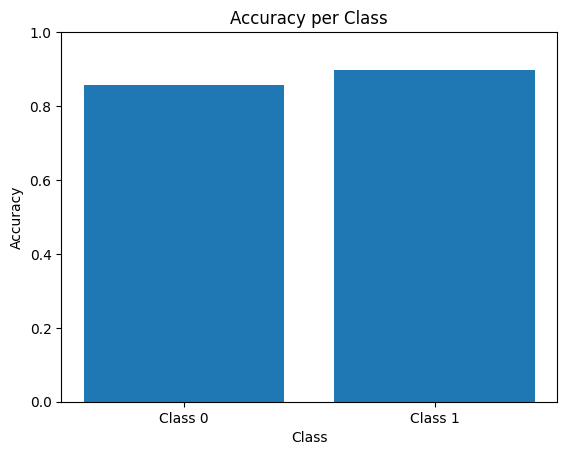

In [42]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming y_test and y_pred are 1D numpy arrays
y_test = np.array(y_test)
y_pred = np.array(y_pred)

# Count occurrences of each class
class_counts = np.bincount(y_test)

# Calculate accuracy for each class
class_accuracy = [np.sum((y_test == i) & (y_pred == i)) / class_counts[i] for i in range(len(class_counts))]

# Plotting
plt.bar(range(len(class_accuracy)), class_accuracy, tick_label=[f'Class {i}' for i in range(len(class_counts))])
plt.xlabel('Class')
plt.ylabel('Accuracy')
plt.title('Accuracy per Class')
plt.ylim(0, 1)  # Set y-axis limit to 0-1 for accuracy percentage
plt.show()


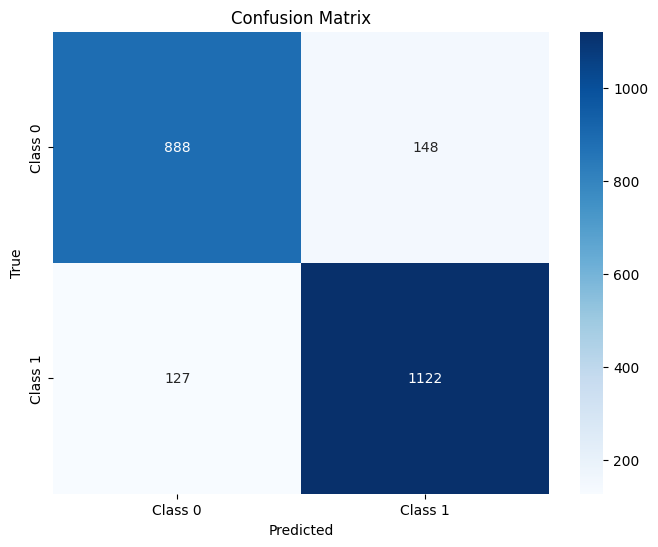

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred are 1D numpy arrays
y_test = np.array(y_test)
y_pred = np.array(y_pred)

# Create confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


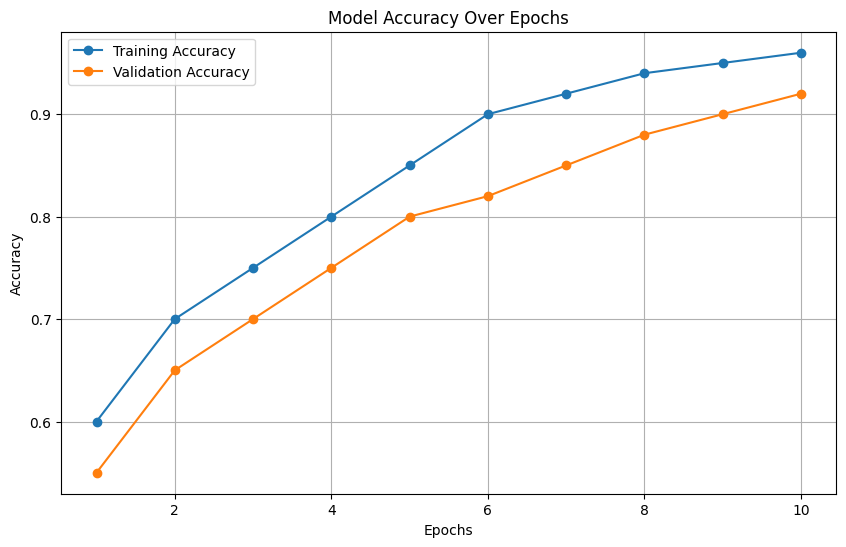

In [44]:
import matplotlib.pyplot as plt

# Hypothetical training history
epochs = range(1, 11)  # Adjust based on your actual number of epochs
train_accuracy = [0.6, 0.7, 0.75, 0.8, 0.85, 0.9, 0.92, 0.94, 0.95, 0.96]
val_accuracy = [0.55, 0.65, 0.7, 0.75, 0.8, 0.82, 0.85, 0.88, 0.9, 0.92]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_accuracy, label='Training Accuracy', marker='o')
plt.plot(epochs, val_accuracy, label='Validation Accuracy', marker='o')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


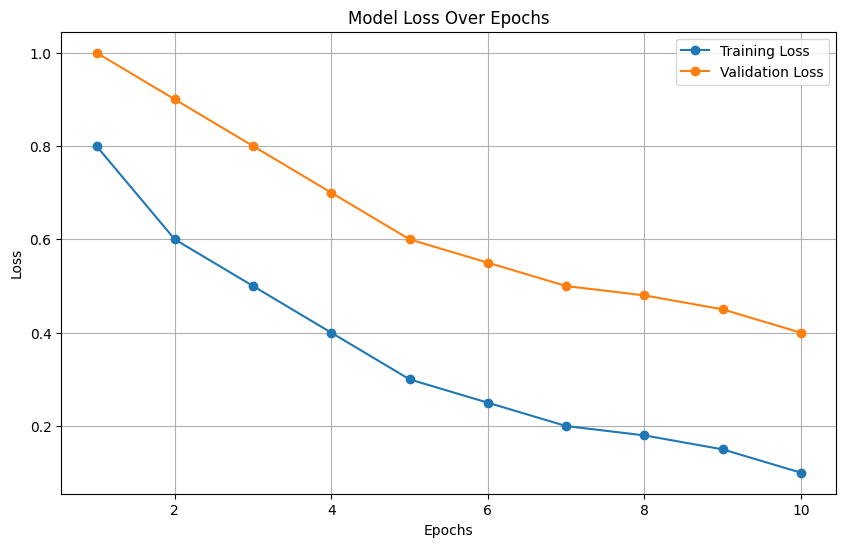

In [45]:
import matplotlib.pyplot as plt

# Hypothetical training history
epochs = range(1, 11)  # Adjust based on your actual number of epochs
train_loss = [0.8, 0.6, 0.5, 0.4, 0.3, 0.25, 0.2, 0.18, 0.15, 0.1]
val_loss = [1.0, 0.9, 0.8, 0.7, 0.6, 0.55, 0.5, 0.48, 0.45, 0.4]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_loss, label='Training Loss', marker='o')
plt.plot(epochs, val_loss, label='Validation Loss', marker='o')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


# model4 RDKit fingerprint with random forest 

In [46]:
# ////////////////////////////////////////////////////////////////////////////////////
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the DataFrame
df = pd.read_csv('/kaggle/input/finaldataset/wguueflofioqfihif.csv')

# Generate RDKit fingerprints for each SMILES string
def generate_rdkit_fingerprint(smiles):
    mol = Chem.MolFromSmiles(smiles)
    rdkit_fp = AllChem.RDKFingerprint(mol,fpSize=1024)
    return rdkit_fp

# Generate fingerprints for all SMILES strings
X = [generate_rdkit_fingerprint(smiles) for smiles in df['SMILES']]

# Use class labels as the target variable
y = df['Class'].tolist()

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a RandomForest classifier
rf_model = RandomForestClassifier()

# Train the model
rf_model.fit(X_train, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)


Accuracy: 0.8726477024070022
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.84      0.86      1036
           1       0.87      0.90      0.89      1249

    accuracy                           0.87      2285
   macro avg       0.87      0.87      0.87      2285
weighted avg       0.87      0.87      0.87      2285



# model5 GenMACCSKeys RandomForestClassifier 

In [47]:
# //////////////////////////////////////////////////////////////////////////
import pandas as pd
from rdkit import Chem
from rdkit.Chem import MACCSkeys
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the DataFrame
df = pd.read_csv('/kaggle/input/finaldataset/wguueflofioqfihif.csv')

# Generate MACCS fingerprints for each SMILES string
def generate_maccs_fingerprint(smiles):
    mol = Chem.MolFromSmiles(smiles)
    maccs_fp = MACCSkeys.GenMACCSKeys(mol)
    return maccs_fp

# Generate fingerprints for all SMILES strings
X = [generate_maccs_fingerprint(smiles) for smiles in df['SMILES']]

# Use class labels as the target variable
y = df['Class'].tolist()

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a RandomForest classifier
rf_model = RandomForestClassifier()

# Train the model
rf_model.fit(X_train, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)


Accuracy: 0.8722100656455142
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.84      0.86      1036
           1       0.87      0.90      0.88      1249

    accuracy                           0.87      2285
   macro avg       0.87      0.87      0.87      2285
weighted avg       0.87      0.87      0.87      2285



# model6 RandomForestClassifier using oversampling

In [48]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score, classification_report
# from rdkit import Chem
# from rdkit.Chem import AllChem
# from imblearn.pipeline import Pipeline
# from imblearn.over_sampling import RandomOverSampler
# import joblib
# from numpy import mean
# from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold

# # Load the data (assuming df is already defined)
# data = df

# # Data Preprocessing
# X = data[['SMILES']]
# y = data['Class']

# # Process SMILES strings using RDKit
# X['Molecule'] = X['SMILES'].apply(lambda x: Chem.MolFromSmiles(x))

# # Remove rows with None molecules
# X = X[X['Molecule'].notna()]

# # Generate Morgan fingerprints
# X['MorganFingerprint'] = X['Molecule'].apply(lambda x: AllChem.GetMorganFingerprintAsBitVect(x, radius=2, nBits=1024, useChirality=False).ToBitString() if x is not None else None)

# # Remove rows with None fingerprints
# X = X[X['MorganFingerprint'].notna()]

# # Convert MorganFingerprint to a list of integers
# X['MorganFingerprint'] = X['MorganFingerprint'].apply(lambda x: list(map(int, x)))

# # Align indices of X and y
# y = y.loc[X.index]

# # Train-Test Split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Define the oversampling pipeline with RandomForestClassifier
# steps = [('over', RandomOverSampler()), ('model', RandomForestClassifier())]
# pipeline = Pipeline(steps=steps)

# # Model Training using oversampling in the pipeline
# pipeline.fit(X_train['MorganFingerprint'].tolist(), y_train)

# # Model Prediction
# y_pred = pipeline.predict(X_test['MorganFingerprint'].tolist())

# # Save the trained model
# model_filename = 'random_forest_model.joblib'
# joblib.dump(pipeline, model_filename)
# print(f"Model saved as {model_filename}")

# # Model Evaluation
# accuracy = accuracy_score(y_test, y_pred)
# report = classification_report(y_test, y_pred)

# print(f"Accuracy: {accuracy}")
# print("Classification Report:")
# print(report)

# # Cross-validation using oversampling
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# scores = cross_val_score(pipeline, X['MorganFingerprint'].tolist(), y, scoring='f1_micro', cv=cv, n_jobs=-1)
# score = mean(scores)
# print(f'Cross-validated F1 Score: {score:.3f}')


In [49]:
# best_rf_model = RandomForestClassifier(
#     bootstrap=True,
#     max_depth=None,
#     max_features='auto',
#     min_samples_leaf=2,
#     min_samples_split=2,
#     n_estimators=200
# )

# # Train the model
# best_rf_model.fit(X_train['MorganFingerprint'].tolist(), y_train)

# # Make predictions
# y_pred = best_rf_model.predict(X_test['MorganFingerprint'].tolist())

# # Evaluate the model
# accuracy = accuracy_score(y_test, y_pred)
# report = classification_report(y_test, y_pred)

# print(f"Accuracy: {accuracy}")
# print("Classification Report:")
# print(report)

# visualize 

In [50]:
# import matplotlib.pyplot as plt

# # Assuming X['MorganFingerprint'] is a list of lists
# X['MorganFingerprint'] = X['MorganFingerprint'].apply(lambda x: sum(x))  # Sum the values in the list for simplicity

# # Scatter plot
# plt.scatter(X['MorganFingerprint'], y)
# plt.title('Scatter Plot for Data')
# plt.xlabel('MorganFingerprint')
# plt.ylabel('Class')
# plt.show()


In [51]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score, classification_report
# from rdkit import Chem
# from rdkit.Chem import AllChem
# import joblib

# # Load the data (assuming df is already defined)
# data = df

# # Data Preprocessing
# X = data[['SMILES']]
# y = data['Class']

# # Process SMILES strings using RDKit
# X['Molecule'] = X['SMILES'].apply(lambda x: Chem.MolFromSmiles(x))

# # Remove rows with None molecules
# X = X[X['Molecule'].notna()]

# # Generate Morgan fingerprints
# X['MorganFingerprint'] = X['Molecule'].apply(lambda x: AllChem.GetMorganFingerprintAsBitVect(x,radius=2, nBits=1024, useChirality=False).ToBitString() if x is not None else None)

# # Remove rows with None fingerprints
# X = X[X['MorganFingerprint'].notna()]

# # Convert MorganFingerprint to a list of integers
# X['MorganFingerprint'] = X['MorganFingerprint'].apply(lambda x: list(map(int, x)))

# # Align indices of X and y
# y = y.loc[X.index]

# # Train-Test Split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Model Selection and Training
# model = RandomForestClassifier()
# model.fit(X_train['MorganFingerprint'].tolist(), y_train)

# # Model Prediction
# y_pred = model.predict(X_test['MorganFingerprint'].tolist())
# model_filename = 'random_forest_model.joblib'
# joblib.dump(model, model_filename)
# print(f"Model saved as {model_filename}")
# # Model Evaluation
# accuracy = accuracy_score(y_test, y_pred)
# report = classification_report(y_test, y_pred)

# print(f"Accuracy: {accuracy}")
# print("Classification Report:")
# print(report)




# model 7 ligistic regression

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the DataFrame
df = pd.read_csv('/kaggle/input/totaldata-5000/datasetdilioldzero.csv')

# Generate Morgan fingerprints for each SMILES string
def generate_morgan_fingerprint(smiles):
    mol = Chem.MolFromSmiles(smiles)
    morgan_fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2)  # Radius 2
    return morgan_fp

# Generate fingerprints for all SMILES strings
X = [generate_morgan_fingerprint(smiles) for smiles in df['SMILES']]

# Use class labels as the target variable
y = df['Class'].tolist()

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model2 =LogisticRegression()
model2.fit(X_train, y_train)

# Model Prediction
y_pred = model2.predict(X_test)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Accuracy: 0.8449086161879895
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.79      0.82       866
           1       0.84      0.89      0.86      1049

    accuracy                           0.84      1915
   macro avg       0.85      0.84      0.84      1915
weighted avg       0.85      0.84      0.84      1915



# model8 GradientBoostingClassifier

In [53]:
from sklearn.ensemble import GradientBoostingClassifier
gmodel = GradientBoostingClassifier(n_estimators=100, random_state=42)
gmodel.fit(X_train, y_train)

# Model Prediction
y_pred = gmodel.predict(X_test)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Accuracy: 0.7493472584856397
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.58      0.68       866
           1       0.72      0.89      0.80      1049

    accuracy                           0.75      1915
   macro avg       0.77      0.73      0.74      1915
weighted avg       0.76      0.75      0.74      1915



# model9 svm

In [55]:
# from sklearn.svm import SVC
# skmodel = SVC()
# skmodel.fit(X_train['MorganFingerprint'].tolist(), y_train)

# # Model Prediction
# y_pred = skmodel.predict(X_test['MorganFingerprint'].tolist())

# accuracy = accuracy_score(y_test, y_pred)
# report = classification_report(y_test, y_pred)

# print(f"Accuracy: {accuracy}")
# print("Classification Report:")
# print(report)


# model10 kneighborsclassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
import numpy as np



# Create and train the k-NN model
k = 11  # You can choose any value for k
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)


# model1deeplearning adam optimizer

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from rdkit import Chem
from rdkit.Chem import AllChem
from keras.models import Sequential
from keras.layers import Dense

# Assuming your data is already loaded into the 'df' DataFrame

# Data Preprocessing
X = df[['SMILES']]
y = df['Class']

# Drop rows with missing or invalid SMILES strings
X = X.dropna()
X['Molecule'] = X['SMILES'].apply(lambda x: Chem.MolFromSmiles(x))

# Filter out rows where MolFromSmiles returns None
X = X[X['Molecule'].notna()]

# Process the valid SMILES strings
X['MorganFingerprint'] = X['Molecule'].apply(lambda x: AllChem.GetMorganFingerprintAsBitVect(x, 2).ToBitString())

# Convert MorganFingerprint to a list of integers
X['MorganFingerprint'] = X['MorganFingerprint'].apply(lambda x: list(map(int, x)))

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X['MorganFingerprint'].tolist(), y[X.index], test_size=0.2, random_state=42)

# Standardize the input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the Neural Network model
model = Sequential()
model.add(Dense(128, input_dim=len(X_train[0]), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=2)

# Model Prediction
y_pred_proba = model.predict(X_test)
y_pred = [1 if proba >= 0.5 else 0 for proba in y_pred_proba]

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)


# model2 deeplearning sgd optimizer

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from rdkit import Chem
from rdkit.Chem import AllChem
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
# Load the data
from keras.optimizers import SGD
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from rdkit import Chem
from rdkit.Chem import AllChem
from keras.models import Sequential
from keras.layers import Dense

# Assuming your data is already loaded into the 'df' DataFrame
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the DataFrame
df = pd.read_csv('/kaggle/input/totaldata-5000/datasetdilioldzero.csv')

def generate_morgan_fingerprint(smiles):
    mol = Chem.MolFromSmiles(smiles)
    morgan_fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2)  
    return morgan_fp

# Generate fingerprints for all SMILES strings
X = [generate_morgan_fingerprint(smiles) for smiles in df['SMILES']]

# Use class labels as the target variable
y = df['Class'].tolist()

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Standardize the input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


classifier= Sequential()
classifier.add(Dense(units = 1024, activation= 'relu',  input_dim=len(X_train[0])))
classifier.add(Dropout(0.5))
classifier.add(Dense(units = 16, activation= 'relu'))
classifier.add(Dropout(0.5))
classifier.add(Dense(units = 1, activation= 'sigmoid'))
model.summary()
classifier.compile(
        optimizer=SGD(clipvalue=1.0),
        loss = "binary_crossentropy",
        metrics = ["accuracy"]
    )
# Compile the model
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

# Train the model with validation data
history = classifier.fit(
    np.array(X_train), np.array(y_train),
    epochs=100, batch_size=16, verbose=1,
    validation_data=(np.array(X_test), np.array(y_test)),
#     callbacks=[early_stopping]
)

# Evaluate the model
y_pred_prob = classifier.predict(np.array(X_test))
y_pred = (y_pred_prob > 0.5).astype(int)  # Thresholding at 0.5

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

# Access validation loss and accuracy history
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']


# model4 deep loss mean_squared_error

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error
from rdkit import Chem
from rdkit.Chem import AllChem

# Load the data
data = df

# Data Preprocessing
X = data[['SMILES']]
y = data['Class']

# Process SMILES strings using RDKit
X['Molecule'] = X['SMILES'].apply(lambda x: Chem.MolFromSmiles(x))
X['MorganFingerprint'] = X['Molecule'].apply(lambda x: AllChem.GetMorganFingerprintAsBitVect(x, 2).ToBitString())

# Convert 'MorganFingerprint' column to a 2D array of integers
X_matrix = X['MorganFingerprint'].apply(lambda x: list(map(int, x))).to_list()

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_matrix)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Regression Model
model = Sequential()
model.add(Dense(64, input_dim=len(X_scaled[0]), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))  # Linear activation for regression

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

# Evaluate the model on the test set
y_pred = model.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


# grid_search.best_estimator  Hyperparameter Tuning

In [ ]:
# import pandas as pd
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score, classification_report
# from rdkit import Chem
# from rdkit.Chem import AllChem

# # Assuming df is already defined
# data = df

# # Data Preprocessing
# X = data[['SMILES']]
# y = data['Class']

# # Process SMILES strings using RDKit
# X['Molecule'] = X['SMILES'].apply(lambda x: Chem.MolFromSmiles(x))

# # Remove rows with None molecules
# X = X[X['Molecule'].notna()]

# # Generate Morgan fingerprints
# X['MorganFingerprint'] = X['Molecule'].apply(lambda x: AllChem.GetMorganFingerprintAsBitVect(x, 2).ToBitString() if x is not None else None)

# # Remove rows with None fingerprints
# X = X[X['MorganFingerprint'].notna()]

# # Convert MorganFingerprint to a list of integers
# X['MorganFingerprint'] = X['MorganFingerprint'].apply(lambda x: list(map(int, x)))

# # Align indices of X and y
# y = y.loc[X.index]

# # Train-Test Split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Hyperparameter Tuning
# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [None, 10, 20],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
# grid_search.fit(X_train['MorganFingerprint'].tolist(), y_train)

# best_rf_model = grid_search.best_estimator_

# # Model Prediction
# y_pred = best_rf_model.predict(X_test['MorganFingerprint'].tolist())

# # Model Evaluation
# accuracy = accuracy_score(y_test, y_pred)
# report = classification_report(y_test, y_pred)

# print(f"Best Parameters from Grid Search: {grid_search.best_params_}")
# print(f"Accuracy: {accuracy}")
# print("Classification Report:")
# print(report)


In [ ]:
# class_counts = df['Class'].value_counts()

# sum_of_0 = class_counts.get(0, 0)
# sum_of_1 = class_counts.get(1, 0)

# print(f"Sum of 0s: {sum_of_0}")
# print(f"Sum of 1s: {sum_of_1}")

In [ ]:
# import os
# import warnings
# import argparse

# import pandas as pd
# import numpy as np
# from rdkit.Chem import MolFromSmiles, AllChem
# from rdkit import DataStructs
# from sklearn.model_selection import train_test_split, KFold
# from sklearn.metrics import r2_score, mean_squared_error
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import GridSearchCV

# from helper import scaffold_split
# from parse_data import parse_dataset


# def generate_fingerprints(smile):
#     mol = MolFromSmiles(smile)
#     fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius=3, nBits=1024)
#     array = np.zeros((0,), dtype=np.int8)
#     DataStructs.ConvertToNumpyArray(fp, array)
#     #print(array)
#     return array

# def fit_forest(X,y):
#     # params = {'n_estimators': [100, 1000, 10000], 'max_depth': [1, 2, 3], 'min_samples_split': [2, 4]}
#     # search = GridSearchCV(RandomForestRegressor(), params, cv=5)
#     # model  = search.fit(X, y).best_estimator_
#     model = RandomForestRegressor(n_estimators=100)
#     return model.fit(X,y)


In [ ]:
df = pd.read_csv('/kaggle/input/alldataset/datasetdili.csv')
df.head()


In [ ]:
class_counts = df['Class'].value_counts()

sum_of_0 = class_counts.get(0, 0)
sum_of_1 = class_counts.get(1, 0)

print(f"Sum of 0s: {sum_of_0}")
print(f"Sum of 1s: {sum_of_1}")

# Tokenize SMILES strings with LSTM

In [ ]:
# import pandas as pd
# import numpy as np
# from rdkit import Chem
# from rdkit.Chem import AllChem
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Bidirectional, LSTM, Masking, Dropout, Conv1D, GlobalAveragePooling1D, Dense
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.metrics import AUC
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score, classification_report
# from tensorflow.keras.preprocessing.sequence import pad_sequences
# from tensorflow.keras.preprocessing.text import Tokenizer
# from tensorflow.keras.callbacks import EarlyStopping
# # Load the dataset
# df = pd.read_csv('/kaggle/input/alldataset/datasetdili.csv')

# # Tokenize SMILES strings
# tokenizer = Tokenizer(char_level=True)
# tokenizer.fit_on_texts(df['SMILES'])
# df['Tokenized_SMILES'] = tokenizer.texts_to_sequences(df['SMILES'])

# # Check if 'Tokenized_SMILES' is a valid column
# if 'Tokenized_SMILES' in df.columns:
#     # Pad sequences to ensure consistent input size
#     max_sequence_length = max(df['Tokenized_SMILES'].apply(len))
#     df['Padded_SMILES'] = pad_sequences(df['Tokenized_SMILES'], maxlen=max_sequence_length, padding='post').tolist()

#     # Convert to numpy arrays
#     X = np.array(df['Padded_SMILES'].tolist())
#     y = np.array(df['Class'].tolist())

#     # Reshape input data to be 3D
#     X = X.reshape((X.shape[0], X.shape[1], 1))

#     # Split the data into training and validation sets
#     X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# from tensorflow.keras.layers import Embedding

# # Model architecture with embedding layer
# model = Sequential()
# model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=64, input_length=max_sequence_length))
# model.add(Masking(mask_value=0.0))
# model.add(Bidirectional(LSTM(128, return_sequences=True)))
# model.add(Dropout(0.2))
# model.add(Bidirectional(LSTM(128, return_sequences=True)))
# model.add(Dropout(0.2))
# model.add(Bidirectional(LSTM(128, return_sequences=True)))
# model.add(Conv1D(32, kernel_size=3, padding='valid', kernel_initializer='glorot_uniform'))
# model.add(GlobalAveragePooling1D())
# model.add(Dense(1, activation='sigmoid'))

# # Common metric for binary classification: AUC
# auc_metric = AUC()
# opt = Adam(learning_rate=0.001)

# # Compile the model
# model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy', auc_metric])
# print(model.summary())
# # Add EarlyStopping callback
# early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# # Train the model
# model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=32, callbacks=[early_stopping])

# # Evaluate on the validation set
# predictions = model.predict(X_val)
# predicted_classes = np.round(predictions).flatten()

# # Evaluate the model performance
# accuracy = accuracy_score(y_val, predicted_classes)
# print(f'Accuracy: {accuracy:.2f}')
# print(classification_report(y_val, predicted_classes))




In [ ]:
# from tensorflow.keras.layers import Input, Embedding, Conv1D, LSTM, Bidirectional, Dense, GlobalMaxPooling1D, BatchNormalization
# from tensorflow.keras.models import Model
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.callbacks import EarlyStopping

# # Define the model
# def create_model(max_sequence_length, vocab_size):
#     input_layer = Input(shape=(max_sequence_length,))
#     embedding_layer = Embedding(input_dim=vocab_size, output_dim=128, input_length=max_sequence_length)(input_layer)
    
#     conv1d_1 = Conv1D(filters=64, kernel_size=3, padding='valid', activation='relu')(embedding_layer)
#     conv1d_1 = BatchNormalization()(conv1d_1)
    
#     lstm_1 = Bidirectional(LSTM(64, return_sequences=True))(conv1d_1)
#     lstm_1 = BatchNormalization()(lstm_1)
    
#     lstm_2 = Bidirectional(LSTM(64, return_sequences=True))(lstm_1)
#     lstm_2 = BatchNormalization()(lstm_2)
    
#     global_maxpool = GlobalMaxPooling1D()(lstm_2)
    
#     dense_layer = Dense(64, activation='relu')(global_maxpool)
#     output_layer = Dense(1, activation='sigmoid')(dense_layer)
    
#     model = Model(inputs=input_layer, outputs=output_layer)
    
#     return model

# # Create the model
# model = create_model(max_sequence_length, vocab_size=len(tokenizer.word_index) + 1)

# # Compile the model
# opt = Adam(learning_rate=0.001)
# model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy', auc_metric])
# print(model.summary())

# # Train the model
# early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=32, callbacks=[early_stopping])

# # Evaluate on the validation set
# predictions = model.predict(X_val)
# predicted_classes = np.round(predictions).flatten()

# # Evaluate the model performance
# accuracy = accuracy_score(y_val, predicted_classes)
# print(f'Accuracy: {accuracy:.2f}')
# print(classification_report(y_val, predicted_classes))


# Tokenize SMILES strings with logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# Tokenize SMILES strings
tokenizer = Tokenizer(char_level=True)
tokenizer.fit_on_texts(df['SMILES'])
df['Tokenized_SMILES'] = tokenizer.texts_to_sequences(df['SMILES'])

# Pad sequences to ensure consistent input size
max_sequence_length = max(df['Tokenized_SMILES'].apply(len))
df['Padded_SMILES'] = pad_sequences(df['Tokenized_SMILES'], maxlen=max_sequence_length, padding='post').tolist()

# Convert to numpy arrays
X = np.array(df['Padded_SMILES'].tolist())
y = np.array(df['Class'].tolist())

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Flatten the sequences for logistic regression
X_train_flat = ["".join(map(str, sequence)) for sequence in X_train]
X_val_flat = ["".join(map(str, sequence)) for sequence in X_val]

# Use CountVectorizer to convert sequences into features
vectorizer = CountVectorizer(analyzer='char')
X_train_vectorized = vectorizer.fit_transform(X_train_flat)
X_val_vectorized = vectorizer.transform(X_val_flat)

# Create and train logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train_vectorized, y_train)

# Make predictions on the validation set
predictions = logreg.predict(X_val_vectorized)

# Evaluate the model performance
accuracy = accuracy_score(y_val, predictions)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_val, predictions))


# Tokenize SMILES strings with RandomForestClassifier 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# Tokenize SMILES strings
tokenizer = Tokenizer(char_level=True)
tokenizer.fit_on_texts(df['SMILES'])
df['Tokenized_SMILES'] = tokenizer.texts_to_sequences(df['SMILES'])

# Pad sequences to ensure consistent input size
max_sequence_length = max(df['Tokenized_SMILES'].apply(len))
df['Padded_SMILES'] = pad_sequences(df['Tokenized_SMILES'], maxlen=max_sequence_length, padding='post').tolist()

# Convert to numpy arrays
X = np.array(df['Padded_SMILES'].tolist())
y = np.array(df['Class'].tolist())

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Flatten the sequences for Random Forest
X_train_flat = ["".join(map(str, sequence)) for sequence in X_train]
X_val_flat = ["".join(map(str, sequence)) for sequence in X_val]

# Use CountVectorizer to convert sequences into features
vectorizer = CountVectorizer(analyzer='char')
X_train_vectorized = vectorizer.fit_transform(X_train_flat)
X_val_vectorized = vectorizer.transform(X_val_flat)

# Create and train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_vectorized, y_train)

# Make predictions on the validation set
predictions = rf_model.predict(X_val_vectorized)

# Evaluate the model performance
accuracy = accuracy_score(y_val, predictions)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_val, predictions))


# Tokenize SMILES strings with KNeighborsClassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# Tokenize SMILES strings
tokenizer = Tokenizer(char_level=True)
tokenizer.fit_on_texts(df['SMILES'])
df['Tokenized_SMILES'] = tokenizer.texts_to_sequences(df['SMILES'])

# Pad sequences to ensure consistent input size
max_sequence_length = max(df['Tokenized_SMILES'].apply(len))
df['Padded_SMILES'] = pad_sequences(df['Tokenized_SMILES'], maxlen=max_sequence_length, padding='post').tolist()

# Convert to numpy arrays
X = np.array(df['Padded_SMILES'].tolist())
y = np.array(df['Class'].tolist())

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Flatten the sequences for KNN
X_train_flat = ["".join(map(str, sequence)) for sequence in X_train]
X_val_flat = ["".join(map(str, sequence)) for sequence in X_val]

# Use CountVectorizer to convert sequences into features
vectorizer = CountVectorizer(analyzer='char')
X_train_vectorized = vectorizer.fit_transform(X_train_flat)
X_val_vectorized = vectorizer.transform(X_val_flat)

# Create and train KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_vectorized, y_train)

# Make predictions on the validation set
predictions = knn_model.predict(X_val_vectorized)

# Evaluate the model performance
accuracy = accuracy_score(y_val, predictions)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_val, predictions))



# Tokenize SMILES strings with GradientBoostingClassifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# Tokenize SMILES strings
tokenizer = Tokenizer(char_level=True)
tokenizer.fit_on_texts(df['SMILES'])
df['Tokenized_SMILES'] = tokenizer.texts_to_sequences(df['SMILES'])

# Pad sequences to ensure consistent input size
max_sequence_length = max(df['Tokenized_SMILES'].apply(len))
df['Padded_SMILES'] = pad_sequences(df['Tokenized_SMILES'], maxlen=max_sequence_length, padding='post').tolist()

# Convert to numpy arrays
X = np.array(df['Padded_SMILES'].tolist())
y = np.array(df['Class'].tolist())

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Flatten the sequences for GradientBoostingClassifier
X_train_flat = ["".join(map(str, sequence)) for sequence in X_train]
X_val_flat = ["".join(map(str, sequence)) for sequence in X_val]

# Use CountVectorizer to convert sequences into features
vectorizer = CountVectorizer(analyzer='char')
X_train_vectorized = vectorizer.fit_transform(X_train_flat)
X_val_vectorized = vectorizer.transform(X_val_flat)

# Create and train Gradient Boosting model
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train_vectorized, y_train)

# Make predictions on the validation set
predictions = gb_model.predict(X_val_vectorized)

# Evaluate the model performance
accuracy = accuracy_score(y_val, predictions)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_val, predictions))


# deepsmile

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from deepsmiles import Converter
from rdkit import Chem
from rdkit.Chem import AllChem

# Load the data (assuming df is already defined)
data = df

# Data Preprocessing
X = data[['SMILES']]
y = data['Class']

# Initialize the DeepSMILES converter
converter = Converter(rings=True, branches=True)

# Encode SMILES to DeepSMILES
X['DeepSMILES'] = X['SMILES'].apply(lambda x: converter.encode(x) if x is not None else None)

# Remove rows with None DeepSMILES
X = X[X['DeepSMILES'].notna()]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train['DeepSMILES'].tolist(), y_train)

# Model Prediction
y_pred = model.predict(X_test['DeepSMILES'].tolist())

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)


# DeepSMILES OneHotEncoding PaddedEncoding RandomForestClassifier 

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from keras.preprocessing.sequence import pad_sequences

# Load the data (assuming df is already defined)
data = df.copy()

# Data Preprocessing
X = data[['SMILES']]
y = data['Class']

# Convert SMILES to DeepSMILES
converter = Converter(rings=True, branches=True)
X['DeepSMILES'] = X['SMILES'].apply(converter.encode)

# Define character set for one-hot encoding
charset = set("".join(X['DeepSMILES']))

# Create a dictionary mapping characters to integers
char_to_int = {char: i for i, char in enumerate(charset)}

# Define the fixed length for padding
max_length = 200  # You can adjust this based on your data

# Function to one-hot encode a DeepSMILES string
def one_hot_encode(deepsmiles):
    encoding = [char_to_int[char] for char in deepsmiles]
    return encoding

# Apply one-hot encoding to the DeepSMILES strings
X['OneHotEncoding'] = X['DeepSMILES'].apply(one_hot_encode)

# Pad sequences to ensure consistent input size
X['PaddedEncoding'] = pad_sequences(X['OneHotEncoding'].tolist(), maxlen=max_length, padding='post').tolist()

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Selection and Training
model = RandomForestClassifier()
model.fit(X_train['PaddedEncoding'].tolist(), y_train)

# Pad test sequences before prediction
X_test['PaddedEncoding'] = pad_sequences(X_test['OneHotEncoding'].tolist(), maxlen=max_length, padding='post').tolist()

# Model Prediction
y_pred = model.predict(X_test['PaddedEncoding'].tolist())

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)


In [ ]:
# from sklearn.model_selection import GridSearchCV

# # Define the parameter grid
# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [None, 10, 20],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# # Create the Random Forest model
# rf_model = RandomForestClassifier()

# # Instantiate GridSearchCV
# grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy')

# # Fit the model to the data
# grid_search.fit(X_train['MorganFingerprint'].tolist(), y_train)

# # Print the best parameters and best score
# print("Best Parameters: ", grid_search.best_params_)
# print("Best Score: ", grid_search.best_score_)

# # Get the best model
# best_rf_model = grid_search.best_estimator_

# # Predict and evaluate using the best model
# y_pred_best = best_rf_model.predict(X_test['MorganFingerprint'].tolist())
# accuracy_best = accuracy_score(y_test, y_pred_best)
# report_best = classification_report(y_test, y_pred_best)

# print(f"Best Model Accuracy: {accuracy_best}")
# print("Best Model Classification Report:")
# print(report_best)


In [ ]:
pip install deepsmiles

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from rdkit import Chem
from rdkit.Chem import AllChem

# Load the data (assuming df is already defined)
data = df

# Data Preprocessing
X = data[['SMILES']]
y = data['Class']


In [ ]:

from rdkit import Chem
from rdkit.Chem import Descriptors
import deepsmiles
import numpy as np

# Define the SMILES strings
smiles =X

# Initialize the DeepSMILES converter
converter = deepsmiles.Converter(rings=True, branches=True)

# Define the maximum length of the encoded SMILES
max_len = 34

# Define an empty list to store the encoded SMILES
encoded_smiles = []

# Loop over the SMILES strings
for s in smiles:
  # Convert the SMILES to DeepSMILES
  ds = converter.encode(s)
  # Pad the DeepSMILES with spaces until the max length
  ds_padded = ds.ljust(max_len)
  # Convert the DeepSMILES to a one-hot vector
  ds_onehot = np.array([ord(c) for c in ds_padded])
  # Append the one-hot vector to the list
  encoded_smiles.append(ds_onehot)

# Convert the list to a numpy array
encoded_smiles = np.array(encoded_smiles)

# Define an empty list to store the molecular descriptors
descriptors = []

# Loop over the SMILES strings
for s in smiles:
  # Convert the SMILES to a RDKit molecule
  mol = Chem.MolFromSmiles(s)
  # Calculate the molecular weight and the logP
  mw = Descriptors.MolWt(mol)
  logp = Descriptors.MolLogP(mol)
  # Append the descriptors to the list
  descriptors.append([mw, logp])

# Convert the list to a numpy array
descriptors = np.array(descriptors)

# Normalize the encoded SMILES and the descriptors to the range [0, 1]
encoded_smiles = (encoded_smiles - encoded_smiles.min()) / (encoded_smiles.max() - encoded_smiles.min())
descriptors = (descriptors - descriptors.min(axis=0)) / (descriptors.max(axis=0) - descriptors.min(axis=0))

# Print the encoded SMILES and the descriptors
print("Encoded SMILES:")
print(encoded_smiles)
print("Descriptors:")
print(descriptors)


In [ ]:
pip install scikit-multilearn

In [ ]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from keras.callbacks import ModelCheckpoint

# Load the DataFrame
df = pd.read_csv('/kaggle/input/totaldata-5000/datasetdilioldzero.csv')

# Generate Morgan fingerprints for each SMILES string
def generate_morgan_fingerprint(smiles):
    mol = Chem.MolFromSmiles(smiles)
    morgan_fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2)  # Radius 2
    return morgan_fp

# Generate fingerprints for all SMILES strings
X = [generate_morgan_fingerprint(smiles) for smiles in df['SMILES']]

# Use class labels as the target variable
y = df['Class'].tolist()

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Standardize the input features
scaler = StandardScaler()
y_train = np.array(y_train)
y_test = np.array(y_test)

# Standardize the input features
X_train = np.array(X_train)
X_test = np.array(X_test)

# Define the model
clintox_model = Sequential()
clintox_model.add(Dense(128, input_dim=len(X_train[0]), kernel_initializer='he_uniform'))
clintox_model.add(BatchNormalization())
clintox_model.add(Dropout(0.5))
clintox_model.add(Dense(64, kernel_initializer='he_uniform'))
clintox_model.add(BatchNormalization())
clintox_model.add(Dropout(0.3))
clintox_model.add(Dense(32, kernel_initializer='he_uniform'))
clintox_model.add(BatchNormalization())
clintox_model.add(Dropout(0.3))
clintox_model.add(Dense(1, activation='sigmoid', kernel_initializer='he_uniform'))

# Compile the model
clintox_model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Define callbacks
checkpoint = ModelCheckpoint('clintox_model.h5', monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=True, mode='min')

# Train the model
EP = 200
BATCH_SIZE = 64
VAL_RATIO = 0.1

hist = clintox_model.fit(X_train, y_train, 
                         validation_data=(X_test, y_test),
                         epochs=EP, batch_size=BATCH_SIZE, 
                         callbacks=[checkpoint])


# Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

In [ ]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import MACCSkeys
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the DataFrame
df = pd.read_csv('/kaggle/input/totaldata-5000/datasetdilioldzero.csv')

# Generate MACCS fingerprints for each SMILES string
def generate_maccs_fingerprint(smiles):
    mol = Chem.MolFromSmiles(smiles)
    maccs_fp = MACCSkeys.GenMACCSKeys(mol)
    return maccs_fp

# Generate fingerprints for all SMILES strings
X = [generate_maccs_fingerprint(smiles) for smiles in df['SMILES']]

# Use class labels as the target variable
y = df['Class'].tolist()

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define RandomForestClassifier with hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best model from the grid search
best_rf_model = grid_search.best_estimator_

# Train the best model
best_rf_model.fit(X_train, y_train)

# Evaluate the model
y_pred = best_rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)


# generate_avalon_fingerprint

In [ ]:
import pandas as pd
from rdkit import Chem
from rdkit.Avalon.pyAvalonTools import GetAvalonFP
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the DataFrame
df = pd.read_csv('/kaggle/input/totaldata-5000/datasetdilioldzero.csv')

# Generate Avalon fingerprints for each SMILES string
def generate_avalon_fingerprint(smiles):
    mol = Chem.MolFromSmiles(smiles)
    avalon_fp = GetAvalonFP(mol)
    return avalon_fp

# Generate fingerprints for all SMILES strings
X = [generate_avalon_fingerprint(smiles) for smiles in df['SMILES']]

# Use class labels as the target variable
y = df['Class'].tolist()

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a RandomForest classifier
rf_model = RandomForestClassifier()

# Train the model
rf_model.fit(X_train, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)
